In [ ]:
import plotly.express as px
# ^^^ pyforest auto-imports - don't write above this line


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (15,8)

In [8]:
# data = pd.read_csv('https://raw.githubusercontent.com/ranga6897/DataAnalysis/master/RiceFarms/RiceFarms.csv',index_col = 0)
data = pd.read_csv('RiceFarms.csv',index_col = 0)

In [12]:
data.head(1)

,id,size,status,varieties,bimas,seed,urea,phosphate,pesticide,pseed,purea,pphosph,hiredlabor,famlabor,totlabor,wage,goutput,noutput,price,region
1,101001,3.0,owner,mixed,mixed,90,900,80,6000,80.0,75.0,75.0,2875,40,2915,68.49,7980,6800,60.0,wargabinangun


In [13]:
def check_mutlicolinearity(data_x):
    corr = data_x.corr()
    corr = pd.DataFrame(np.tril(corr, k=-1),      # gets Lower triangular matrix
                        columns=data_x.columns,
                        index=data_x.columns)  

    corr = corr.replace(0.000000, np.NAN)
    count_of_total_correlation_values = corr.count().sum()

    for i in [0.5, 0.6, 0.7, 0.8, 0.9]:
        data_corr = corr[abs(corr) > i]
        count_greater_than_thresh = data_corr.count().sum()
        print(f'Percent Values Greater than {i} co-relation : {count_greater_than_thresh/count_of_total_correlation_values}')
    return corr

In [24]:
def plot_corr(threshold, corr):
    data_corr = corr[abs(corr) > threshold]
    sns.heatmap(data_corr, annot=True, cmap="YlGnBu")
    plt.show()

In [25]:
data_x = data.drop(columns=['region','status','varieties','bimas','id'])
# data_target = data['class']

corr = check_mutlicolinearity(data_x)

Percent Values Greater than 0.5 co-relation : 0.3333333333333333
Percent Values Greater than 0.6 co-relation : 0.2761904761904762
Percent Values Greater than 0.7 co-relation : 0.20952380952380953
Percent Values Greater than 0.8 co-relation : 0.14285714285714285
Percent Values Greater than 0.9 co-relation : 0.0380952380952381


* As ~30% of features are correlated, We can reduce the redundancy using PCA.

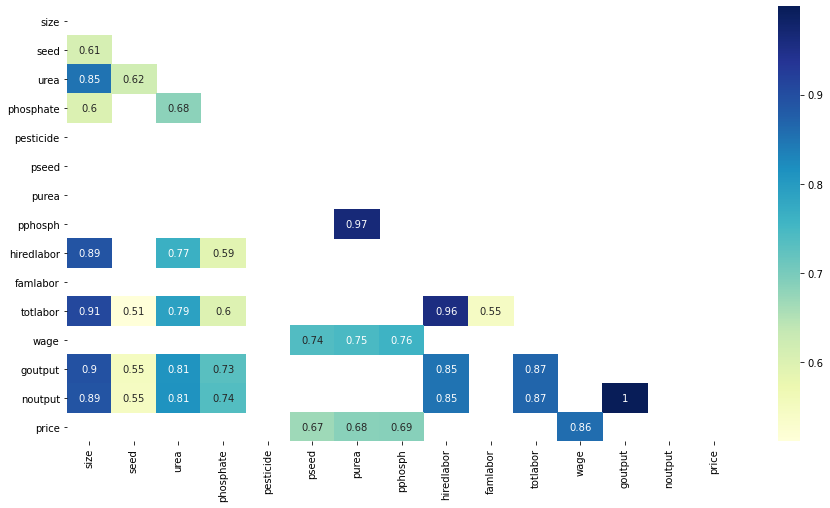

In [26]:
plot_corr(0.5, corr)

In [9]:
data['region_en'] = data['region'].replace({'gunungwangi':0,'ciwangi':1,'malausma':2,'langan':3,'sukaambit':4,'wargabinangun':5})

In [10]:
data['size_bn']= pd.cut(data['size'],bins = 6,labels = np.arange(6))
data['size_bn'] = data['size_bn'].astype('int')

<IPython.core.display.Javascript object>

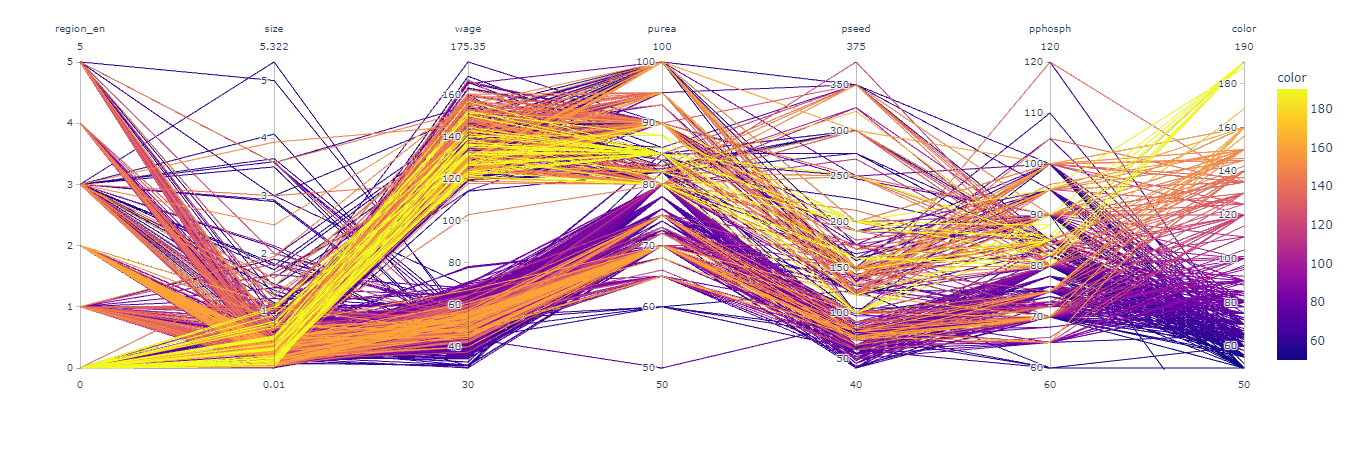

In [11]:
fig = px.parallel_coordinates(data[['region_en','size','wage','purea','pseed','pphosph']], color=data['price'])
fig.show()

<IPython.core.display.Javascript object>

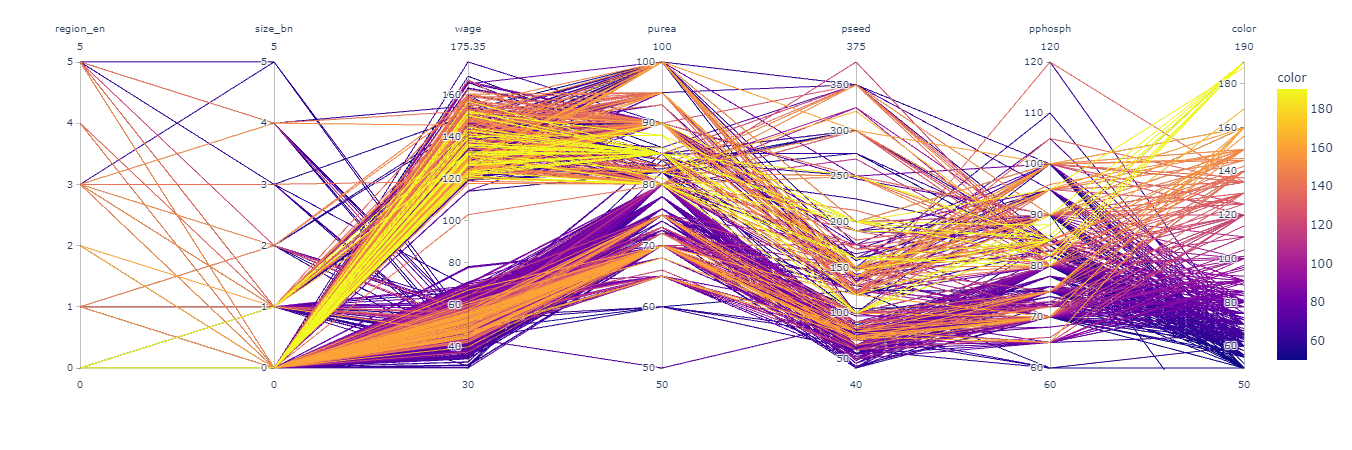

In [12]:
fig = px.parallel_coordinates(data[['region_en','size_bn','wage','purea','pseed','pphosph']], color=data['price'])
fig.show()